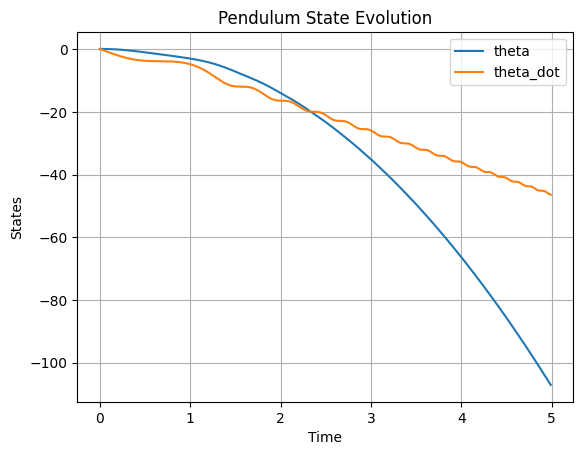

In [7]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# System dynamics
def pendulum_dynamics(theta, theta_dot, u):
    m = 1.0  # mass of the pendulum
    l = 1.0  # length of the pendulum
    g = 9.81  # acceleration due to gravity

    theta_double_dot = (u - m * g * l * np.sin(theta)) / (m * l**2)

    return theta_dot, theta_double_dot

# Control Lyapunov function (CLF)
def clf(theta, theta_dot):
    return 0.5 * theta_dot**2 + 9.81 * np.cos(theta)

# CLF time derivative
def clf_derivative(x, u):
    theta_dot = x[1]
    theta_double_dot = pendulum_dynamics(x[0], x[1], u)[1]

    return -theta_dot * theta_double_dot

# Pendulum simulation
def simulate_pendulum(x0, controller, dt, T):
    t = np.arange(0, T, dt)
    x = np.zeros((len(t), len(x0)))
    x[0] = x0

    for i in range(1, len(t)):
        u = controller(x[i-1])
        theta_dot, theta_double_dot = pendulum_dynamics(x[i-1, 0], x[i-1, 1], u)
        x[i] = x[i-1] + dt * np.array([theta_dot, theta_double_dot])

    return t, x

# Optimization-based control
def control_pendulum(x):
    u = cp.Variable()
    clf_dot = clf_derivative(x, u)

    # Optimization problem
    objective = cp.Minimize(clf_dot)
    constraints = [u >= -1, u <= 1]  # Control constraints

    prob = cp.Problem(objective, constraints)
    prob.solve()

    if prob.status == cp.OPTIMAL:
        return u.value
    else:
        return 0.0

# Simulation parameters
x0 = np.array([0.1, 0.0])  # Initial state
dt = 0.01  # Time step
T = 5.0  # Total simulation time

# Simulate and control the pendulum
t, x = simulate_pendulum(x0, control_pendulum, dt, T)

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='theta')
plt.plot(t, x[:, 1], label='theta_dot')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('Pendulum State Evolution')
plt.grid(True)
plt.show()
